<a href="https://colab.research.google.com/github/kb10241024/CLASSIFIER_MODELS/blob/master/Happy-or-sad/Happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What's in this model:**


1.   Download zipped dataset of 80 images(40-happy 40-sad) and extract into /tmp folder
3.   Show few dataset images which are of different sizes(4*4 Grid)
4.   Build a model(using convolutions, MaxPooling and Dense layers)
5.   Data-Preprocessing - (with Data-Augmentation(using ImageDataGenerator))
6.   Training for 15 epochs which shows 99% training-accuracy and 85% validation-accuracy.
7.   Uploading Images to test model.
8.   Terminate the Kernel

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

--2019-12-06 12:51:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 2a00:1450:400c:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2019-12-06 12:51:00 (172 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [2]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir


In [0]:
zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [4]:
# Directory with our training horse pictures
happy_dir = os.path.join('/tmp/h-or-s/happy')
happy_names=os.listdir(happy_dir)
print('total training happy images:', len(happy_names))
print(happy_names[:10])

# Directory with our training human pictures
sad_dir = os.path.join('/tmp/h-or-s/sad')
sad_names=os.listdir(sad_dir)
print('total training sad images:', len(sad_names))
print(sad_names[:10])

total training happy images: 40
['happy1-19.png', 'happy2-19.png', 'happy2-00.png', 'happy2-06.png', 'happy1-07.png', 'happy2-08.png', 'happy2-01.png', 'happy1-00.png', 'happy1-06.png', 'happy1-15.png']
total training sad images: 40
['sad2-11.png', 'sad2-13.png', 'sad2-03.png', 'sad1-14.png', 'sad1-16.png', 'sad2-00.png', 'sad2-14.png', 'sad2-15.png', 'sad2-02.png', 'sad1-17.png']


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 happy and 8 sad pictures. You can rerun the cell to see a fresh batch each time:

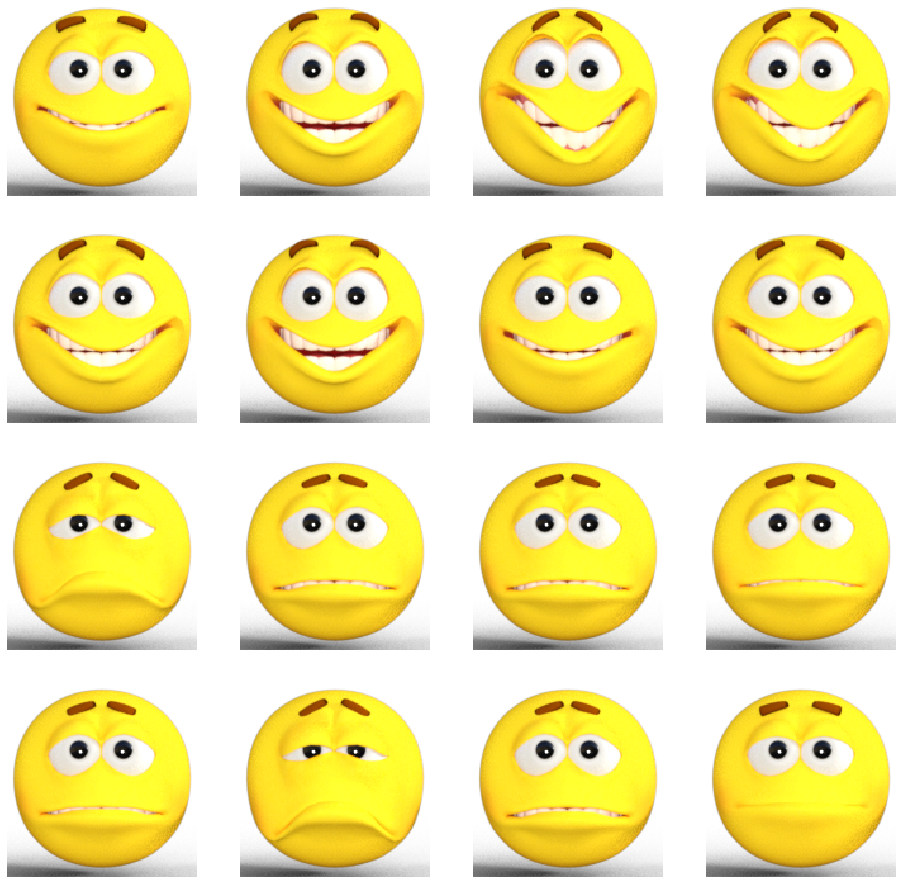

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(happy_dir, fname) 
                for fname in happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad_dir, fname) 
                for fname in sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
DESIRED_ACCURACY = 0.99


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if logs.get('acc') > DESIRED_ACCURACY :
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training=True
  # Your Code):
  # Your Code

callbacks = myCallback()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        #tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation='sigmoid')
# Your Code Here
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])# Your Code Here #)

In [19]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)# Your Code Here

train_generator = train_datagen.flow_from_directory(
       '/tmp/h-or-s/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

        # Your Code Here)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [20]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
        steps_per_epoch=8,  
        epochs=50,
        verbose=1,
        callbacks=[callbacks])

      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/50
8/8 [==============================] - 5s 660ms/step - loss: 1.8159 - acc: 0.5562
Epoch 2/50
8/8 [==============================] - 5s 599ms/step - loss: 0.7062 - acc: 0.6328
Epoch 3/50
8/8 [==============================] - 5s 602ms/step - loss: 0.6211 - acc: 0.6938
Epoch 4/50
8/8 [==============================] - 5s 600ms/step - loss: 0.6422 - acc: 0.6875
Epoch 5/50
8/8 [==============================] - 5s 602ms/step - loss: 0.5620 - acc: 0.7672
Epoch 6/50
8/8 [==============================] - 5s 609ms/step - loss: 0.4080 - acc: 0.8359
Epoch 7/50
8/8 [==============================] - 5s 600ms/step - loss: 0.4488 - acc: 0.7984
Epoch 8/50
8/8 [==============================] - 5s 600ms/step - loss: 0.4292 - acc: 0.8141
Epoch 9/50
8/8 [==============================] - 5s 600ms/step - loss: 0.3838 - acc: 0.8219
Epoch 10/50
8/8 [==============================] - 5s 601ms/step - loss: 0.3821 - acc: 0.8141
Epoch 11/50
8/8 [==============================] - 5s 603ms/step - lo

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

Saving Happy Emoji [Download iPhone Emojis].png to Happy Emoji [Download iPhone Emojis].png


In [23]:
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a sad")
  else:
    print(fn + " is a happy")

[0.]
Happy Emoji [Download iPhone Emojis].png is a happy


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)